In [ ]:
cd drive/My\ Drive/flights

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [53]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')
from matplotlib.pylab import rcParams
plt.style.use('fivethirtyeight')



In [51]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller , acf , pacf
from statsmodels.tsa.arima_model import ARIMA
import math
import matplotlib.pyplot as plt 
% matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6
import warnings
warnings.filterwarnings('ignore')

### Import CSVs

In [2]:
domestic_2019_df = pd.read_csv('T100D_2019_data.csv')

In [3]:
domestic_2019_df.shape

(122975, 19)

In [4]:
domestic_2018_df = pd.read_csv('T100D_2018_data.csv')

In [5]:
domestic_2018_df.shape

(250353, 19)

In [5]:
domestic_2017_df = pd.read_csv('T100D_2017_data.csv')

In [6]:
domestic_2016_df = pd.read_csv('T100D_2016_data.csv')

In [7]:
domestic_2015_df = pd.read_csv('T100D_2015_data.csv')

In [8]:
domestic_2014_df = pd.read_csv('T100D_2014_data.csv')

In [9]:
domestic_2013_df = pd.read_csv('T100D_2013_data.csv')

In [10]:
domestic_2012_df = pd.read_csv('T100D_2012_data.csv')

In [11]:
domestic_2011_df = pd.read_csv('T100D_2011_data.csv')

In [12]:
domestic_2010_df = pd.read_csv('T100D_2010_data.csv')

In [29]:
domestic_df = pd.concat([domestic_2019_df, domestic_2018_df, domestic_2017_df, domestic_2016_df, domestic_2015_df,
                        domestic_2014_df, domestic_2013_df, domestic_2012_df, domestic_2011_df, domestic_2010_df])

In [30]:
domestic_df

,PASSENGERS,DISTANCE,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_NM,YEAR,MONTH,DISTANCE_GROUP,CLASS,Unnamed: 18
0,0.0,1241.0,0WQ,Avjet Corporation,10423,30423,AUS,"Austin, TX",Texas,10800,32575,BUR,"Burbank, CA",California,2019,1,3,L,NaN
1,0.0,256.0,0WQ,Avjet Corporation,10800,32575,BUR,"Burbank, CA",California,13476,34922,MRY,"Monterey, CA",California,2019,1,1,L,NaN
2,0.0,325.0,0WQ,Avjet Corporation,10800,32575,BUR,"Burbank, CA",California,13796,32457,OAK,"Oakland, CA",California,2019,1,1,L,NaN
3,0.0,46.0,0WQ,Avjet Corporation,10800,32575,BUR,"Burbank, CA",California,14908,32575,SNA,"Santa Ana, CA",California,2019,1,1,L,NaN
4,0.0,100.0,0WQ,Avjet Corporation,12173,32134,HNL,"Honolulu, HI",Hawaii,13830,33830,OGG,"Kahului, HI",Hawaii,2019,1,1,L,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263157,83752.0,403.0,DL,Delta Air Lines Inc.,10397,30397,ATL,"Atlanta, GA",Georgia,13204,31454,MCO,"Orlando, FL",Florida,2010,10,1,F,NaN
263158,84322.0,100.0,HA,Hawaiian Airlines Inc.,12173,32134,HNL,"Honolulu, HI",Hawaii,13830,33830,OGG,"Kahului, HI",Hawaii,2010,7,1,F,NaN
263159,84717.0,100.0,HA,Hawaiian Airlines Inc.,13830,33830,OGG,"Kahului, HI",Hawaii,12173,32134,HNL,"Honolulu, HI",Hawaii,2010,8,1,F,NaN
263160,85216.0,403.0,DL,Delta Air Lines Inc.,10397,30397,ATL,"Atlanta, GA",Georgia,13204,31454,MCO,"Orlando, FL",Florida,2010,3,1,F,NaN


In [31]:
del domestic_df['Unnamed: 18']

The 'CITY_MARKET_ID' column groups airports in different cities that serve the same market, so we'll use that as the main identifier for a destination. Supplementary tables are provided detailing the city market based on code, which we'll include in the table.

In [32]:
domestic_df.set_index('DEST_CITY_MARKET_ID', inplace=True)

In [33]:
#import supplementary table of markets based on city market ID
markets = pd.read_csv('mrkt_description.csv', index_col='Code')

In [34]:
#join tables for additional column of market 
domestic_df = domestic_df.join(markets, how='inner')

In [35]:
domestic_df.isna().sum()

PASSENGERS                 0
DISTANCE                   0
UNIQUE_CARRIER           358
UNIQUE_CARRIER_NAME      171
ORIGIN_AIRPORT_ID          0
ORIGIN_CITY_MARKET_ID      0
ORIGIN                     0
ORIGIN_CITY_NAME           0
ORIGIN_STATE_NM            0
DEST_AIRPORT_ID            0
DEST                       0
DEST_CITY_NAME             0
DEST_STATE_NM              0
YEAR                       0
MONTH                      0
DISTANCE_GROUP             0
CLASS                      0
Unnamed: 0                 0
Description                0
dtype: int64

In [36]:
domestic_df.head()

,PASSENGERS,DISTANCE,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_NM,YEAR,MONTH,DISTANCE_GROUP,CLASS,Unnamed: 0,Description
30003,6.0,109.0,8E,Bering Air Inc.,13970,33970,OTZ,"Kotzebue, AK",Alaska,11946,GMT,"Granite Mountain, AK",Alaska,2019,6,1,L,1,"Granite Mountain, AK"
30003,3.0,137.0,8E,Bering Air Inc.,13873,33873,OME,"Nome, AK",Alaska,11946,GMT,"Granite Mountain, AK",Alaska,2014,7,1,L,1,"Granite Mountain, AK"
30003,0.0,137.0,8E,Bering Air Inc.,13873,33873,OME,"Nome, AK",Alaska,11946,GMT,"Granite Mountain, AK",Alaska,2013,8,1,L,1,"Granite Mountain, AK"
30003,0.0,147.0,7S,Ryan Air f/k/a Arctic Transportation,13873,33873,OME,"Nome, AK",Alaska,10003,03A,"Granite Mountain, AK",Alaska,2013,9,1,G,1,"Granite Mountain, AK"
30003,3.0,137.0,8E,Bering Air Inc.,13873,33873,OME,"Nome, AK",Alaska,11946,GMT,"Granite Mountain, AK",Alaska,2013,7,1,L,1,"Granite Mountain, AK"


In [20]:
# del domestic_df['Unnamed: 18']

In [37]:
del domestic_df['Unnamed: 0']

In [38]:
domestic_df['Day'] = 1

In [39]:
#create Datetime column
domestic_df['ds'] = pd.to_datetime(domestic_df[['YEAR','MONTH', 'Day']])

In [40]:
domestic_df.set_index('ds', inplace=True)

In [41]:
domestic_df.head()

,PASSENGERS,DISTANCE,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_NM,YEAR,MONTH,DISTANCE_GROUP,CLASS,Description,Day
ds,,,,,,,,,,,,,,,,,,,
2019-06-01,6.0,109.0,8E,Bering Air Inc.,13970,33970,OTZ,"Kotzebue, AK",Alaska,11946,GMT,"Granite Mountain, AK",Alaska,2019,6,1,L,"Granite Mountain, AK",1
2014-07-01,3.0,137.0,8E,Bering Air Inc.,13873,33873,OME,"Nome, AK",Alaska,11946,GMT,"Granite Mountain, AK",Alaska,2014,7,1,L,"Granite Mountain, AK",1
2013-08-01,0.0,137.0,8E,Bering Air Inc.,13873,33873,OME,"Nome, AK",Alaska,11946,GMT,"Granite Mountain, AK",Alaska,2013,8,1,L,"Granite Mountain, AK",1
2013-09-01,0.0,147.0,7S,Ryan Air f/k/a Arctic Transportation,13873,33873,OME,"Nome, AK",Alaska,10003,03A,"Granite Mountain, AK",Alaska,2013,9,1,G,"Granite Mountain, AK",1
2013-07-01,3.0,137.0,8E,Bering Air Inc.,13873,33873,OME,"Nome, AK",Alaska,11946,GMT,"Granite Mountain, AK",Alaska,2013,7,1,L,"Granite Mountain, AK",1


In [42]:
domestic_df = domestic_df[['PASSENGERS', 'Description']]
domestic_df.head()

,PASSENGERS,Description
ds,,
2019-06-01,6.0,"Granite Mountain, AK"
2014-07-01,3.0,"Granite Mountain, AK"
2013-08-01,0.0,"Granite Mountain, AK"
2013-09-01,0.0,"Granite Mountain, AK"
2013-07-01,3.0,"Granite Mountain, AK"


In [43]:
domestic_df['city'] = domestic_df['Description'].apply(lambda x: x.split(',')[0].split('/')[0])

In [44]:
domestic_df.head()

,PASSENGERS,Description,city
ds,,,
2019-06-01,6.0,"Granite Mountain, AK",Granite Mountain
2014-07-01,3.0,"Granite Mountain, AK",Granite Mountain
2013-08-01,0.0,"Granite Mountain, AK",Granite Mountain
2013-09-01,0.0,"Granite Mountain, AK",Granite Mountain
2013-07-01,3.0,"Granite Mountain, AK",Granite Mountain


In [45]:
sums = pd.DataFrame(domestic_df.groupby('Description')['PASSENGERS'].sum())

# Find top 25 US cities visited

In [46]:
top_cities = sums.sort_values('PASSENGERS', ascending=False)
top_25 = list(top_cities[:25].index)
top_25

['Atlanta, GA (Metropolitan Area)',
 'New York City, NY (Metropolitan Area)',
 'Chicago, IL',
 'Los Angeles, CA (Metropolitan Area)',
 'Dallas/Fort Worth, TX',
 'Washington, DC (Metropolitan Area)',
 'San Francisco, CA (Metropolitan Area)',
 'Denver, CO',
 'Houston, TX',
 'Miami, FL (Metropolitan Area)',
 'Phoenix, AZ',
 'Las Vegas, NV',
 'Charlotte, NC',
 'Seattle, WA',
 'Orlando, FL',
 'Boston, MA (Metropolitan Area)',
 'Minneapolis/St. Paul, MN',
 'Detroit, MI',
 'Philadelphia, PA',
 'Salt Lake City, UT',
 'San Diego, CA',
 'Tampa, FL (Metropolitan Area)',
 'Portland, OR',
 'Honolulu, HI',
 'St. Louis, MO']

# Visualization for top 25 cities visited

In [ ]:
top_25cities2 = local_flights1.groupby('city')['passengers'].mean().sort_values(ascending=False).reset_index()[:10]
top_25cities2

In [48]:
top_25cities2 = domestic_df.groupby('city')['PASSENGERS'].mean().sort_values(ascending=False).reset_index()[:10]
top_25cities2

,city,PASSENGERS
0,Atlanta,8266.150690
1,Las Vegas,6236.648274
2,Orlando,6101.372852
3,Honolulu,5995.355748
4,Dallas,5954.751506
5,Phoenix,5417.935325
6,Charlotte,5134.535074
7,Seattle,5086.381868
8,San Francisco,4952.730554
9,San Diego,4863.042622


# Visualization of Top 25 cities

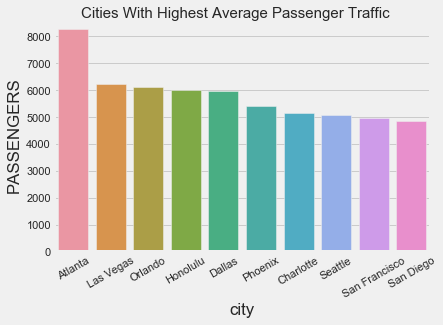

In [54]:
top_25_2 = sns.barplot(x=top_25cities2['city'], y= top_25cities2["PASSENGERS"] , data = top_25cities2)
top_25_2.set_xticklabels(labels = top_25_2.get_xticklabels() , rotation=30)
top_25_2.figure.suptitle("Cities With Highest Average Passenger Traffic" , y = 0.92 , fontsize = 15)
plt.show()

In [ ]:
# plt.figure(figsize = (10,3))
# local_flights1.plot(kind = 'bar' , x = 'city' , y = 'passengers')
# plt.title("top 25 cities")
# plt.xlabel("city")
# plt.legend()
# plt.show()

In [ ]:
# plt.figure(figsize = (12,8))
# sns.countplot(data = local_flights1 ,y = 'passengers')

In [55]:
#remove cities not in top 25 from US dataframe
domestic_df = domestic_df[domestic_df['Description'].apply(lambda x: x in top_25)]

In [56]:
domestic_df.head()

,PASSENGERS,Description,city
ds,,,
2019-01-01,0.0,"Dallas/Fort Worth, TX",Dallas
2019-01-01,0.0,"Dallas/Fort Worth, TX",Dallas
2019-01-01,0.0,"Dallas/Fort Worth, TX",Dallas
2019-01-01,0.0,"Dallas/Fort Worth, TX",Dallas
2019-01-01,0.0,"Dallas/Fort Worth, TX",Dallas


In [57]:
#group by day and destination
domestic_df = pd.DataFrame(domestic_df.groupby([domestic_df.index,'Description', 'city'])['PASSENGERS'].sum().reset_index())


In [58]:
domestic_df['Type'] = 'Domestic'

In [59]:
domestic_df.head()

,ds,Description,city,PASSENGERS,Type
0,2010-01-01,"Atlanta, GA (Metropolitan Area)",Atlanta,2735491.0,Domestic
1,2010-01-01,"Boston, MA (Metropolitan Area)",Boston,1008661.0,Domestic
2,2010-01-01,"Charlotte, NC",Charlotte,1221593.0,Domestic
3,2010-01-01,"Chicago, IL",Chicago,2427421.0,Domestic
4,2010-01-01,"Dallas/Fort Worth, TX",Dallas,2114255.0,Domestic


## Import International Data

In [73]:
international_df = pd.read_csv('International_data.csv', header=[1])
international_df

,Region,Hong Kong SAR (China),United Kingdom,Singapore,France,United Arab Emirates,Malaysia,Thailand,India,Japan,Italy,Turkey,Taiwan,Netherlands,South Korea,Spain,Germany,Greece,Croatia,Iceland
0,Jan-10,"1,906,253","4,830,092","1,681,005","4,154,249","1,878,388","2,601,868","749,879","1,499,009",NaN,"2,297,141","513,811","214,118","1,489,035",NaN,"1,672,945",NaN,NaN,"165,000","38,726"
1,Feb-10,"1,903,106","4,600,406","1,499,346","3,821,563","1,803,584","2,531,547","746,204","1,493,435",NaN,"2,190,848","1,056,434","251,329","1,416,049",NaN,"1,828,004",NaN,NaN,"145,000","37,292"
2,Mar-10,"1,996,482","5,211,877","1,674,208","4,654,929","1,930,197","2,802,885","693,866","1,554,893",NaN,"2,791,984","1,904,256","241,466","1,762,140",NaN,"2,287,264",NaN,NaN,"199,000","48,812"
3,Apr-10,"2,066,587","4,446,530","1,617,186","4,062,475","1,815,735","2,648,646","569,080","1,631,005",NaN,"2,912,851","3,007,152","286,677","1,472,647",NaN,"2,229,097",NaN,NaN,"267,000","42,197"
4,May-10,"1,989,423","5,255,772","1,613,748","5,199,610","1,766,404","2,729,223","426,423","1,844,582",NaN,"3,239,359","5,416,059","311,368","2,068,682",NaN,"2,511,974",NaN,NaN,"492,000","51,566"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Get list of international cities and duplicate Data for Easy Manipulation later

In [75]:
international_df1 = international_df.copy()

In [76]:
international_df1.columns

Index(['Region', 'Hong Kong SAR (China)', 'United Kingdom', 'Singapore',
       'France', 'United Arab Emirates', 'Malaysia', 'Thailand', 'India',
       'Japan', 'Italy', 'Turkey', 'Taiwan', 'Netherlands', 'South Korea',
       'Spain', 'Germany', 'Greece', 'Croatia', 'Iceland'],
      dtype='object')

In [74]:
international_df.columns

Index(['Region', 'Hong Kong SAR (China)', 'United Kingdom', 'Singapore',
       'France', 'United Arab Emirates', 'Malaysia', 'Thailand', 'India',
       'Japan', 'Italy', 'Turkey', 'Taiwan', 'Netherlands', 'South Korea',
       'Spain', 'Germany', 'Greece', 'Croatia', 'Iceland'],
      dtype='object')

In [77]:
international_df = international_df.rename(columns = {'Region':'ds'})

In [78]:
international_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 20 columns):
ds                       114 non-null object
Hong Kong SAR (China)    114 non-null object
United Kingdom           114 non-null object
Singapore                114 non-null object
France                   114 non-null object
United Arab Emirates     108 non-null object
Malaysia                 114 non-null object
Thailand                 114 non-null object
India                    114 non-null object
Japan                    90 non-null object
Italy                    114 non-null object
Turkey                   114 non-null object
Taiwan                   114 non-null object
Netherlands              114 non-null object
South Korea              65 non-null object
Spain                    114 non-null object
Germany                  102 non-null object
Greece                   81 non-null object
Croatia                  114 non-null object
Iceland                  114 non-null objec

In [79]:
#Sort out the date format by Converting to Y-M-D format
# pd.to_datetime(int_data['ds'] , format = "%m/%d/%y" , errors = 'ignore').head() # used this to convert the dates 
#OR
international_df['ds'] = pd.to_datetime(international_df['ds'],format='%b-%y', yearfirst=False)

In [80]:
international_df.head()

,ds,Hong Kong SAR (China),United Kingdom,Singapore,France,United Arab Emirates,Malaysia,Thailand,India,Japan,Italy,Turkey,Taiwan,Netherlands,South Korea,Spain,Germany,Greece,Croatia,Iceland
0,2010-01-01,"1,906,253","4,830,092","1,681,005","4,154,249","1,878,388","2,601,868","749,879","1,499,009",NaN,"2,297,141","513,811","214,118","1,489,035",NaN,"1,672,945",NaN,NaN,"165,000","38,726"
1,2010-02-01,"1,903,106","4,600,406","1,499,346","3,821,563","1,803,584","2,531,547","746,204","1,493,435",NaN,"2,190,848","1,056,434","251,329","1,416,049",NaN,"1,828,004",NaN,NaN,"145,000","37,292"
2,2010-03-01,"1,996,482","5,211,877","1,674,208","4,654,929","1,930,197","2,802,885","693,866","1,554,893",NaN,"2,791,984","1,904,256","241,466","1,762,140",NaN,"2,287,264",NaN,NaN,"199,000","48,812"
3,2010-04-01,"2,066,587","4,446,530","1,617,186","4,062,475","1,815,735","2,648,646","569,080","1,631,005",NaN,"2,912,851","3,007,152","286,677","1,472,647",NaN,"2,229,097",NaN,NaN,"267,000","42,197"
4,2010-05-01,"1,989,423","5,255,772","1,613,748","5,199,610","1,766,404","2,729,223","426,423","1,844,582",NaN,"3,239,359","5,416,059","311,368","2,068,682",NaN,"2,511,974",NaN,NaN,"492,000","51,566"


In [40]:
#impute subsequent value for that month and location to NaNs:
# international_df = international_df.fillna(value=None, method='backfill', axis=None, limit=35, downcast=None)

In [81]:
international_df = international_df[international_df.ds < '2019-02-01']

In [82]:
international_df.head()

,ds,Hong Kong SAR (China),United Kingdom,Singapore,France,United Arab Emirates,Malaysia,Thailand,India,Japan,Italy,Turkey,Taiwan,Netherlands,South Korea,Spain,Germany,Greece,Croatia,Iceland
0,2010-01-01,"1,906,253","4,830,092","1,681,005","4,154,249","1,878,388","2,601,868","749,879","1,499,009",NaN,"2,297,141","513,811","214,118","1,489,035",NaN,"1,672,945",NaN,NaN,"165,000","38,726"
1,2010-02-01,"1,903,106","4,600,406","1,499,346","3,821,563","1,803,584","2,531,547","746,204","1,493,435",NaN,"2,190,848","1,056,434","251,329","1,416,049",NaN,"1,828,004",NaN,NaN,"145,000","37,292"
2,2010-03-01,"1,996,482","5,211,877","1,674,208","4,654,929","1,930,197","2,802,885","693,866","1,554,893",NaN,"2,791,984","1,904,256","241,466","1,762,140",NaN,"2,287,264",NaN,NaN,"199,000","48,812"
3,2010-04-01,"2,066,587","4,446,530","1,617,186","4,062,475","1,815,735","2,648,646","569,080","1,631,005",NaN,"2,912,851","3,007,152","286,677","1,472,647",NaN,"2,229,097",NaN,NaN,"267,000","42,197"
4,2010-05-01,"1,989,423","5,255,772","1,613,748","5,199,610","1,766,404","2,729,223","426,423","1,844,582",NaN,"3,239,359","5,416,059","311,368","2,068,682",NaN,"2,511,974",NaN,NaN,"492,000","51,566"


In [83]:
#impute following value for that month and location to NaNs:

international_df = international_df.fillna(value=None, method='ffill', axis=None, limit=35, downcast=None)

In [84]:
international_df.isna().sum()

ds                        0
Hong Kong SAR (China)     0
United Kingdom            0
Singapore                 0
France                    0
United Arab Emirates      0
Malaysia                  0
Thailand                  0
India                     0
Japan                    24
Italy                     0
Turkey                    0
Taiwan                    0
Netherlands               0
South Korea              31
Spain                     0
Germany                  12
Greece                   33
Croatia                   0
Iceland                   0
dtype: int64

In [85]:
international_df = pd.DataFrame(international_df.set_index('ds').unstack()).reset_index()
international_df

,level_0,ds,0
0,Hong Kong SAR (China),2010-01-01,"1,906,253"
1,Hong Kong SAR (China),2010-02-01,"1,903,106"
2,Hong Kong SAR (China),2010-03-01,"1,996,482"
3,Hong Kong SAR (China),2010-04-01,"2,066,587"
4,Hong Kong SAR (China),2010-05-01,"1,989,423"
...,...,...,...
2066,Iceland,2018-09-01,"265,842"
2067,Iceland,2018-10-01,"263,587"
2068,Iceland,2018-11-01,"184,982"
2069,Iceland,2018-12-01,"186,853"


# Rename Column names for the new DataFrame

In [86]:
international_df = international_df.rename(columns = {'level_0': 'city', 0: 'PASSENGERS'})

# Create new column for type of flight to International for International flights 

In [87]:
international_df['Type'] = 'International'

In [88]:
international_df.head()

,city,ds,PASSENGERS,Type
0,Hong Kong SAR (China),2010-01-01,"1,906,253",International
1,Hong Kong SAR (China),2010-02-01,"1,903,106",International
2,Hong Kong SAR (China),2010-03-01,"1,996,482",International
3,Hong Kong SAR (China),2010-04-01,"2,066,587",International
4,Hong Kong SAR (China),2010-05-01,"1,989,423",International


# Create Capital Cities for International Cities

In [89]:
international_df.loc[international_df['city'] == 'Hong Kong SAR (China)', 'city'] = 'Hong Kong'

In [90]:
international_df.loc[international_df['city'] == 'United Kingdom', 'city'] = 'London'
international_df.loc[international_df['city'] == 'France', 'city'] = 'Paris'
international_df.loc[international_df['city'] == 'United Arab Emirates', 'city'] = 'Dubai'
international_df.loc[international_df['city'] == 'Malaysia', 'city'] = 'Kuala Lumpur'
international_df.loc[international_df['city'] == 'Thailand', 'city'] = 'Phuket'
international_df.loc[international_df['city'] == 'India', 'city'] = 'Delhi'
international_df.loc[international_df['city'] == 'Japan', 'city'] = 'Tokyo'
international_df.loc[international_df['city'] == 'Italy', 'city'] = 'Rome'
international_df.loc[international_df['city'] == 'Turkey', 'city'] = 'Antalya'
international_df.loc[international_df['city'] == 'Taiwan', 'city'] = 'Taipei'
international_df.loc[international_df['city'] == 'Netherlands', 'city'] = 'Amsterdam'
international_df.loc[international_df['city'] == 'South Korea', 'city'] = 'Seoul'
international_df.loc[international_df['city'] == 'Spain', 'city'] = 'Barcelona'
international_df.loc[international_df['city'] == 'Germany', 'city'] = 'Berlin'
international_df.loc[international_df['city'] == 'Greece', 'city'] = 'Athens'
international_df.loc[international_df['city'] == 'Iceland', 'city'] = 'Reykjavik'

In [91]:
international_df

,city,ds,PASSENGERS,Type
0,Hong Kong,2010-01-01,"1,906,253",International
1,Hong Kong,2010-02-01,"1,903,106",International
2,Hong Kong,2010-03-01,"1,996,482",International
3,Hong Kong,2010-04-01,"2,066,587",International
4,Hong Kong,2010-05-01,"1,989,423",International
...,...,...,...,...
2066,Reykjavik,2018-09-01,"265,842",International
2067,Reykjavik,2018-10-01,"263,587",International
2068,Reykjavik,2018-11-01,"184,982",International
2069,Reykjavik,2018-12-01,"186,853",International


# Concat International And Domestic Flight DataFrames

In [92]:
combined_df = pd.concat([domestic_df, international_df], sort=False)

In [93]:
combined_df

,ds,Description,city,PASSENGERS,Type
0,2010-01-01,"Atlanta, GA (Metropolitan Area)",Atlanta,2.73549e+06,Domestic
1,2010-01-01,"Boston, MA (Metropolitan Area)",Boston,1.00866e+06,Domestic
2,2010-01-01,"Charlotte, NC",Charlotte,1.22159e+06,Domestic
3,2010-01-01,"Chicago, IL",Chicago,2.42742e+06,Domestic
4,2010-01-01,"Dallas/Fort Worth, TX",Dallas,2.11426e+06,Domestic
...,...,...,...,...,...
2066,2018-09-01,NaN,Reykjavik,"265,842",International
2067,2018-10-01,NaN,Reykjavik,"263,587",International
2068,2018-11-01,NaN,Reykjavik,"184,982",International
2069,2018-12-01,NaN,Reykjavik,"186,853",International


In [ ]:
#Create a new column for Month with Lambda

In [94]:
combined_df['Month'] = combined_df.ds.apply(lambda x: x.month)

In [95]:
combined_df.isna().sum()

ds                0
Description    2071
city              0
PASSENGERS      100
Type              0
Month             0
dtype: int64

In [96]:
combined_df.groupby(['city', 'Month'])['PASSENGERS']

In [97]:
#impute following value for that month and location to NaNs:
combined_df.PASSENGERS = combined_df.groupby(['city', 'Month']).PASSENGERS.bfill()


In [98]:
combined_df

,ds,Description,city,PASSENGERS,Type,Month
0,2010-01-01,"Atlanta, GA (Metropolitan Area)",Atlanta,2.73549e+06,Domestic,1
1,2010-01-01,"Boston, MA (Metropolitan Area)",Boston,1.00866e+06,Domestic,1
2,2010-01-01,"Charlotte, NC",Charlotte,1.22159e+06,Domestic,1
3,2010-01-01,"Chicago, IL",Chicago,2.42742e+06,Domestic,1
4,2010-01-01,"Dallas/Fort Worth, TX",Dallas,2.11426e+06,Domestic,1
...,...,...,...,...,...,...
2066,2018-09-01,NaN,Reykjavik,"265,842",International,9
2067,2018-10-01,NaN,Reykjavik,"263,587",International,10
2068,2018-11-01,NaN,Reykjavik,"184,982",International,11
2069,2018-12-01,NaN,Reykjavik,"186,853",International,12


In [102]:
#Drop Columns
combined_df.drop(columns = {'Description' , "Month"} , inplace = True)

In [103]:
#check results
combined_df

,ds,city,PASSENGERS,Type
0,2010-01-01,Atlanta,2.73549e+06,Domestic
1,2010-01-01,Boston,1.00866e+06,Domestic
2,2010-01-01,Charlotte,1.22159e+06,Domestic
3,2010-01-01,Chicago,2.42742e+06,Domestic
4,2010-01-01,Dallas,2.11426e+06,Domestic
...,...,...,...,...
2066,2018-09-01,Reykjavik,"265,842",International
2067,2018-10-01,Reykjavik,"263,587",International
2068,2018-11-01,Reykjavik,"184,982",International
2069,2018-12-01,Reykjavik,"186,853",International


In [104]:
#Check for Null values in DF
combined_df.isna().sum()

ds            0
city          0
PASSENGERS    0
Type          0
dtype: int64

## Get Weather Data

In [105]:
import requests

In [106]:
dom_cities = list(map(lambda x: x.split('(')[0].split(',')[0].split('/')[0], top_25))
for i, city in enumerate(dom_cities):
    dom_cities[i] = city.replace(' ', '_')
    
dom_cities

['Atlanta',
 'New_York_City',
 'Chicago',
 'Los_Angeles',
 'Dallas',
 'Washington',
 'San_Francisco',
 'Denver',
 'Houston',
 'Miami',
 'Phoenix',
 'Las_Vegas',
 'Charlotte',
 'Seattle',
 'Orlando',
 'Boston',
 'Minneapolis',
 'Detroit',
 'Philadelphia',
 'Salt_Lake_City',
 'San_Diego',
 'Tampa',
 'Portland',
 'Honolulu',
 'St._Louis']

In [107]:
int_cities = list(map(lambda x: x.split('(')[0].split(',')[0].split('/')[0], international_df['city'].unique()))
for i, city in enumerate(int_cities):
    int_cities[i] = city.replace(' ', '_')
    
int_cities

['Hong_Kong',
 'London',
 'Singapore',
 'Paris',
 'Dubai',
 'Kuala_Lumpur',
 'Phuket',
 'Delhi',
 'Tokyo',
 'Rome',
 'Antalya',
 'Taipei',
 'Amsterdam',
 'Seoul',
 'Barcelona',
 'Berlin',
 'Athens',
 'Croatia',
 'Reykjavik']

In [108]:
cities = dom_cities + int_cities

In [65]:
api_key = 'exbuNW5R'

In [109]:
stations = {}
for city in cities:
    try:
        response = requests.get(f'https://api.meteostat.net/v1/stations/search?q={city}&key=exbuNW5R').json()
        station = response['data'][0]['id']
        stations[f'{city}'] = station
    except:
        stations[f'{city}'] = 'Not Available'

In [110]:
stations

{'Atlanta': '72219',
 'New_York_City': 'KNYC0',
 'Chicago': '72530',
 'Los_Angeles': '72295',
 'Dallas': '72259',
 'Washington': '72405',
 'San_Francisco': '72494',
 'Denver': '72565',
 'Houston': '72243',
 'Miami': '72202',
 'Phoenix': '72278',
 'Las_Vegas': '78373',
 'Charlotte': '72314',
 'Seattle': '72793',
 'Orlando': '72205',
 'Boston': '72509',
 'Minneapolis': '72658',
 'Detroit': '72537',
 'Philadelphia': '72408',
 'Salt_Lake_City': '72572',
 'San_Diego': '72290',
 'Tampa': '72211',
 'Portland': '72606',
 'Honolulu': '91182',
 'St._Louis': 'KSUS0',
 'Hong_Kong': '45007',
 'London': '68858',
 'Singapore': '48698',
 'Paris': '07149',
 'Dubai': '41194',
 'Kuala_Lumpur': 'Not Available',
 'Phuket': '48564',
 'Delhi': '42182',
 'Tokyo': '47662',
 'Rome': '87046',
 'Antalya': '17300',
 'Taipei': '46696',
 'Amsterdam': '06240',
 'Seoul': '47110',
 'Barcelona': '08181',
 'Berlin': '10381',
 'Athens': '72311',
 'Croatia': 'Not Available',
 'Reykjavik': '04030'}

In [111]:
requests.get(f'https://api.meteostat.net/v1/stations/search?q=fuzhou&key=exbuNW5R').json()

{'meta': {}, 'data': [{'id': '58847', 'country': 'CN', 'name': 'Fuzhou'}]}

In [112]:
stations['New_York_City'] = 72503
stations['St._Louis'] = 72434
stations['Washington'] = 72406
stations['Kuala_Lumpur'] = 48665
stations['Taipei'] = 46756
stations['Croatia'] = 14474
stations['Las_Vegas'] = 72488
stations['Croatia'] = 14445
stations['Hong_Kong'] = 59431
stations['Seoul'] = 47108
stations['Phuket'] = 48565
stations['Amsterdam'] = 10312
stations['Taipei'] = 58847

In [113]:
stations

{'Atlanta': '72219',
 'New_York_City': 72503,
 'Chicago': '72530',
 'Los_Angeles': '72295',
 'Dallas': '72259',
 'Washington': 72406,
 'San_Francisco': '72494',
 'Denver': '72565',
 'Houston': '72243',
 'Miami': '72202',
 'Phoenix': '72278',
 'Las_Vegas': 72488,
 'Charlotte': '72314',
 'Seattle': '72793',
 'Orlando': '72205',
 'Boston': '72509',
 'Minneapolis': '72658',
 'Detroit': '72537',
 'Philadelphia': '72408',
 'Salt_Lake_City': '72572',
 'San_Diego': '72290',
 'Tampa': '72211',
 'Portland': '72606',
 'Honolulu': '91182',
 'St._Louis': 72434,
 'Hong_Kong': 59431,
 'London': '68858',
 'Singapore': '48698',
 'Paris': '07149',
 'Dubai': '41194',
 'Kuala_Lumpur': 48665,
 'Phuket': 48565,
 'Delhi': '42182',
 'Tokyo': '47662',
 'Rome': '87046',
 'Antalya': '17300',
 'Taipei': 58847,
 'Amsterdam': 10312,
 'Seoul': 47108,
 'Barcelona': '08181',
 'Berlin': '10381',
 'Athens': '72311',
 'Croatia': 14445,
 'Reykjavik': '04030'}

In [114]:
def weatherGetter(stations):
    city_weather_history = []
    city = {}

    for i, v in stations.items():
        response = requests.get(f'https://api.meteostat.net/v1/history/monthly?station={v}&start=2009-01&end=2019-01&key=exbuNW5R').json() 
        for m in response['data']:
            try:
                month = {}
                month['city_name'] = i
                month['month'] = m['month']
                month['temperature_mean'] = m['temperature_mean']
                month['precipitation'] = m['precipitation']
                month['rain_days'] = m['raindays']
                month['pressure'] = m['pressure']

                city_weather_history.append(month) 
#                 print(f"Retrieved {i}'s weather data")
            except:
                month['city_name'] = i
                month['month'] = 0
                month['temperature_mean'] = 0
                month['precipitation'] = 0
                month['rain_days'] = 0
                month['pressure'] = 0
                city_weather_history.append(month) 
#                 print(f"Could not retrieve {i}'s weather data")
    
    return city_weather_history

In [115]:
requests.get(f'https://api.meteostat.net/v1/history/monthly?station=58847&start=2009-01&end=2019-01&key=exbuNW5R').json()

{'meta': {'source': 'National Oceanic and Atmospheric Administration, Deutscher Wetterdienst'},
 'data': [{'month': '2009-01',
   'temperature_mean': 10.7,
   'temperature_mean_min': 7.2,
   'temperature_mean_max': 15.7,
   'temperature_min': 1.5,
   'temperature_max': 24.2,
   'precipitation': 24,
   'raindays': 4,
   'pressure': 1025,
   'sunshine': 147},
  {'month': '2009-02',
   'temperature_mean': 15.5,
   'temperature_mean_min': 12.4,
   'temperature_mean_max': 21.1,
   'temperature_min': 7.4,
   'temperature_max': 29.7,
   'precipitation': 12,
   'raindays': 2,
   'pressure': 1017.9,
   'sunshine': 94},
  {'month': '2009-03',
   'temperature_mean': 14.2,
   'temperature_mean_min': 11.1,
   'temperature_mean_max': 18.7,
   'temperature_min': 6.1,
   'temperature_max': 29.3,
   'precipitation': 115,
   'raindays': 14,
   'pressure': 1018.2,
   'sunshine': 93},
  {'month': '2009-04',
   'temperature_mean': 18.8,
   'temperature_mean_min': 15.6,
   'temperature_mean_max': 23.7,
   '

In [116]:
weather_data = pd.DataFrame(weatherGetter(stations))

In [117]:
weather_data

,city_name,month,temperature_mean,precipitation,rain_days,pressure
0,Atlanta,2009-01,6.5,73.0,10.0,1019.6
1,Atlanta,2009-02,8.6,94.0,4.0,1022.3
2,Atlanta,2009-03,12.8,181.0,8.0,1020.4
3,Atlanta,2009-04,15.9,132.0,9.0,1016.8
4,Atlanta,2009-05,21.2,115.0,14.0,1016.8
...,...,...,...,...,...,...
5283,Reykjavik,2018-09,7.1,75.0,15.0,1004.6
5284,Reykjavik,2018-10,3.9,114.0,21.0,998.5
5285,Reykjavik,2018-11,4.2,107.0,9.0,1002.3
5286,Reykjavik,2018-12,2.7,82.0,16.0,998.5


In [118]:
weather_data['city_name'] = weather_data['city_name'].apply(lambda x: x.replace('_', ' '))

In [119]:
#create Datetime column
weather_data['Year'] = weather_data.month.apply(lambda x: x.split('-')[0])
weather_data['Month'] = weather_data.month.apply(lambda x: x.split('-')[1])
weather_data['Day'] = 1
weather_data['month'] = pd.to_datetime(weather_data[['Year','Month', 'Day']])

In [120]:
weather_data.isna().sum()

city_name             0
month                 0
temperature_mean      3
precipitation        55
rain_days            33
pressure            295
Year                  0
Month                 0
Day                   0
dtype: int64

In [121]:
#impute mean temperature for that month and location to NaNs:
weather_data['temperature_mean'] = weather_data.groupby(['city_name', 'Month'])['temperature_mean'].transform(lambda x: x.fillna(x.mean()))

In [122]:
#impute mean precipitation for that month and location to NaNs:
weather_data['precipitation'] = weather_data.groupby(['city_name', 'Month'])['precipitation'].transform(lambda x: x.fillna(x.mean()))

In [123]:
#impute mean rain_days for that month and location to NaNs:
weather_data['rain_days'] = weather_data.groupby(['city_name', 'Month'])['rain_days'].transform(lambda x: x.fillna(x.mean()))

In [124]:
#impute mean pressure for that month and location to NaNs:
weather_data['pressure'] = weather_data.groupby(['city_name', 'Month'])['pressure'].transform(lambda x: x.fillna(x.mean()))

In [125]:
#impute mean pressure of dataset to NaNs where not available:
weather_data['pressure'] = weather_data['pressure'].transform(lambda x: x.fillna(x.mean()))

In [126]:
weather_data.isna().sum()

city_name           0
month               0
temperature_mean    0
precipitation       0
rain_days           0
pressure            0
Year                0
Month               0
Day                 0
dtype: int64

### Merge domestic df and weather

In [127]:
combined_df2 = combined_df.merge(weather_data, how='left', left_on = ['ds', 'city'], right_on = ['month', 'city_name'])


In [128]:
combined_df2 = combined_df2[combined_df2['ds'] < '2019-02-01']

In [129]:
combined_df2.head()

,ds,city,PASSENGERS,Type,city_name,month,temperature_mean,precipitation,rain_days,pressure,Year,Month,Day
0,2010-01-01,Atlanta,2.73549e+06,Domestic,Atlanta,2010-01-01,3.6,137.0,7.0,1019.500000,2010,01,1.0
1,2010-01-01,Boston,1.00866e+06,Domestic,Boston,2010-01-01,-1.3,60.0,5.0,1012.000000,2010,01,1.0
2,2010-01-01,Charlotte,1.22159e+06,Domestic,Charlotte,2010-01-01,3.1,124.0,7.0,1018.300000,2010,01,1.0
3,2010-01-01,Chicago,2.42742e+06,Domestic,Chicago,2010-01-01,-5.5,29.0,4.0,1020.000000,2010,01,1.0
4,2010-01-01,Dallas,2.11426e+06,Domestic,Dallas,2010-01-01,6.6,72.0,6.0,1020.711111,2010,01,1.0


In [130]:
combined_df2.isna().sum()

ds                   0
city                 0
PASSENGERS           0
Type                 0
city_name           12
month               12
temperature_mean    12
precipitation       12
rain_days           12
pressure            12
Year                12
Month               12
Day                 12
dtype: int64

In [131]:
#create an extra column for Month
combined_df2['Month'] = combined_df2['ds'].apply(lambda x: x.month)

In [132]:
#create a new column for Year with Lambda
combined_df2['Year'] = combined_df2['ds'].apply(lambda x: x.year)

In [133]:
combined_df2.head()

,ds,city,PASSENGERS,Type,city_name,month,temperature_mean,precipitation,rain_days,pressure,Year,Month,Day
0,2010-01-01,Atlanta,2.73549e+06,Domestic,Atlanta,2010-01-01,3.6,137.0,7.0,1019.500000,2010,1,1.0
1,2010-01-01,Boston,1.00866e+06,Domestic,Boston,2010-01-01,-1.3,60.0,5.0,1012.000000,2010,1,1.0
2,2010-01-01,Charlotte,1.22159e+06,Domestic,Charlotte,2010-01-01,3.1,124.0,7.0,1018.300000,2010,1,1.0
3,2010-01-01,Chicago,2.42742e+06,Domestic,Chicago,2010-01-01,-5.5,29.0,4.0,1020.000000,2010,1,1.0
4,2010-01-01,Dallas,2.11426e+06,Domestic,Dallas,2010-01-01,6.6,72.0,6.0,1020.711111,2010,1,1.0


In [134]:
combined_df2['temperature_mean'] = combined_df2.groupby(['city', 'Month'])['temperature_mean'].transform(lambda x: x.fillna(value=None, method='backfill', axis=None, limit=35, downcast=None))
combined_df2['precipitation'] = combined_df2.groupby(['city', 'Month'])['precipitation'].transform(lambda x: x.fillna(value=None, method='backfill', axis=None, limit=35, downcast=None))
combined_df2['rain_days'] = combined_df2.groupby(['city', 'Month'])['rain_days'].transform(lambda x: x.fillna(value=None, method='backfill', axis=None, limit=35, downcast=None))
combined_df2['pressure'] = combined_df2.groupby(['city', 'Month'])['pressure'].transform(lambda x: x.fillna(value=None, method='backfill', axis=None, limit=35, downcast=None))

In [135]:
combined_df2.isna().sum()

ds                   0
city                 0
PASSENGERS           0
Type                 0
city_name           12
month               12
temperature_mean     0
precipitation        0
rain_days            0
pressure             0
Year                 0
Month                0
Day                 12
dtype: int64

In [136]:
combined_df2 = combined_df2[['ds', 'city', 'PASSENGERS', 'Type','Month', 'Year','temperature_mean', 'precipitation', 'rain_days', 'pressure']]


In [137]:
combined_df2.head()

,ds,city,PASSENGERS,Type,Month,Year,temperature_mean,precipitation,rain_days,pressure
0,2010-01-01,Atlanta,2.73549e+06,Domestic,1,2010,3.6,137.0,7.0,1019.500000
1,2010-01-01,Boston,1.00866e+06,Domestic,1,2010,-1.3,60.0,5.0,1012.000000
2,2010-01-01,Charlotte,1.22159e+06,Domestic,1,2010,3.1,124.0,7.0,1018.300000
3,2010-01-01,Chicago,2.42742e+06,Domestic,1,2010,-5.5,29.0,4.0,1020.000000
4,2010-01-01,Dallas,2.11426e+06,Domestic,1,2010,6.6,72.0,6.0,1020.711111


In [138]:
combined_df2.isna().sum()

ds                  0
city                0
PASSENGERS          0
Type                0
Month               0
Year                0
temperature_mean    0
precipitation       0
rain_days           0
pressure            0
dtype: int64

## Get Cost of Living Index

In [139]:
from bs4 import BeautifulSoup as BS
import urllib.request

In [140]:
years = [2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010]

cost_of_living = []
for year in years:
    url = f'https://www.numbeo.com/cost-of-living/rankings.jsp?title={year}&displayColumn=0'
    resp = urllib.request.urlopen(url)
    soup = BS(resp, from_encoding=resp.info().get_param('charset'))
    table = soup.find_all(class_='cityOrCountryInIndicesTable')
    data = soup.find_all(_='sorting_1')
    for x in soup.find_all(style = 'width: 100%'):
        country = {}
        country['city'] = x.get_text(strip=True).split(',')[0]
        country['cost_of_living_index'] = x.get_text().split()[-1]
        country['year'] = year
        cost_of_living.append(country)

# Create a new DataFrame for Cost Of Living Index

In [141]:
index= pd.DataFrame(cost_of_living)
index

,city,cost_of_living_index,year
0,Basel,131.37,2019
1,Zurich,126.87,2019
2,Lausanne,123.42,2019
3,Bern,123.17,2019
4,Geneva,118.87,2019
...,...,...,...
3797,Pune,32.55,2010
3798,Delhi,32.43,2010
3799,Hyderabad,32.00,2010
3800,Chennai,31.18,2010


In [142]:
#check for Null values
index.isna().sum()

city                    0
cost_of_living_index    0
year                    0
dtype: int64

In [143]:
index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3802 entries, 0 to 3801
Data columns (total 3 columns):
city                    3802 non-null object
cost_of_living_index    3802 non-null object
year                    3802 non-null int64
dtypes: int64(1), object(2)
memory usage: 89.2+ KB


- As seen from the above convert cost of living index column to numeric values

In [145]:
# def coerce_df_columns_to_numeric(df, column_list):
#     df[column_list] = df[column_list].apply(pd.to_numeric, errors='coerce')
#OR
# index['cost_of_living_index'] = index.cost_of_living.astype(float)

index['cost_of_living_index'] = pd.to_numeric(index['cost_of_living_index'], errors='coerce')

In [146]:
index.head()

,city,cost_of_living_index,year
0,Basel,131.37,2019
1,Zurich,126.87,2019
2,Lausanne,123.42,2019
3,Bern,123.17,2019
4,Geneva,118.87,2019


In [148]:
index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3802 entries, 0 to 3801
Data columns (total 3 columns):
city                    3802 non-null object
cost_of_living_index    3802 non-null float64
year                    3802 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 89.2+ KB


In [150]:
index[index.duplicated(subset=['year', 'city'])]

,city,cost_of_living_index,year
207,London,57.09,2019
221,San Jose,54.50,2019
476,Hamilton,88.09,2018
567,Portland,78.45,2018
584,Melbourne,77.09,2018
617,Burlington,74.32,2018
655,Birmingham,71.60,2018
658,Manchester,71.46,2018
685,London,69.39,2018
703,Vancouver,67.79,2018


In [151]:
#Drop duplicates
index = index.sort_values('cost_of_living_index', ascending=False).drop_duplicates(['year','city']).sort_index()


In [152]:
#sort out City names
index.city.replace('New York', 'New York City', inplace=True)
index.city.replace('Split', 'Croatia', inplace=True)
index.city.replace('Saint Louis', 'St. Louis', inplace=True)

In [153]:
index.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3760 entries, 0 to 3801
Data columns (total 3 columns):
city                    3760 non-null object
cost_of_living_index    3760 non-null float64
year                    3760 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 117.5+ KB


In [154]:
#Convert year to integer
index.year = index.year.astype(int)

# Merge DataFrames - Add Const of Living Index to DataFrame

In [156]:
combined_df3 = combined_df2.merge(index, how='left', left_on = ['Year', 'city'], right_on = ['year', 'city'])

In [157]:
combined_df3

,ds,city,PASSENGERS,Type,Month,Year,temperature_mean,precipitation,rain_days,pressure,cost_of_living_index,year
0,2010-01-01,Atlanta,2.73549e+06,Domestic,1,2010,3.6,137.0,7.0,1019.500000,100.99,2010.0
1,2010-01-01,Boston,1.00866e+06,Domestic,1,2010,-1.3,60.0,5.0,1012.000000,89.11,2010.0
2,2010-01-01,Charlotte,1.22159e+06,Domestic,1,2010,3.1,124.0,7.0,1018.300000,NaN,NaN
3,2010-01-01,Chicago,2.42742e+06,Domestic,1,2010,-5.5,29.0,4.0,1020.000000,NaN,NaN
4,2010-01-01,Dallas,2.11426e+06,Domestic,1,2010,6.6,72.0,6.0,1020.711111,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4791,2018-09-01,Reykjavik,"265,842",International,9,2018,7.1,75.0,15.0,1004.600000,123.78,2018.0
4792,2018-10-01,Reykjavik,"263,587",International,10,2018,3.9,114.0,21.0,998.500000,123.78,2018.0
4793,2018-11-01,Reykjavik,"184,982",International,11,2018,4.2,107.0,9.0,1002.300000,123.78,2018.0
4794,2018-12-01,Reykjavik,"186,853",International,12,2018,2.7,82.0,16.0,998.500000,123.78,2018.0


In [159]:
combined_df3.info() #there are a few null values in the cost of living index and year

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4796 entries, 0 to 4795
Data columns (total 12 columns):
ds                      4796 non-null datetime64[ns]
city                    4796 non-null object
PASSENGERS              4796 non-null object
Type                    4796 non-null object
Month                   4796 non-null int64
Year                    4796 non-null int64
temperature_mean        4796 non-null float64
precipitation           4796 non-null float64
rain_days               4796 non-null float64
pressure                4796 non-null float64
cost_of_living_index    4208 non-null float64
year                    4208 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(2), object(3)
memory usage: 487.1+ KB


In [160]:
#Check for null values
combined_df3.isna().sum()

ds                        0
city                      0
PASSENGERS                0
Type                      0
Month                     0
Year                      0
temperature_mean          0
precipitation             0
rain_days                 0
pressure                  0
cost_of_living_index    588
year                    588
dtype: int64

In [ ]:
#Decision :
- Drop column for year and impute - transform cost of living index column


In [162]:
combined_df3.drop('year', 1, inplace = True) #drop year on axis 1 inplace set to true to apply change to DF

In [163]:
#Check result
combined_df.columns

Index(['ds', 'city', 'PASSENGERS', 'Type'], dtype='object')

In [164]:
#sort values by date - ds
combined_df3.sort_values(by='ds', inplace=True)

In [165]:
combined_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4796 entries, 0 to 4795
Data columns (total 11 columns):
ds                      4796 non-null datetime64[ns]
city                    4796 non-null object
PASSENGERS              4796 non-null object
Type                    4796 non-null object
Month                   4796 non-null int64
Year                    4796 non-null int64
temperature_mean        4796 non-null float64
precipitation           4796 non-null float64
rain_days               4796 non-null float64
pressure                4796 non-null float64
cost_of_living_index    4208 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 449.6+ KB


In [166]:
#Impute null values for cost of living
combined_df3['cost_of_living_index'] = combined_df3.groupby(['city'])['cost_of_living_index'].transform(lambda x: x.fillna(method='ffill'))
combined_df3['cost_of_living_index'] = combined_df3.groupby(['city'])['cost_of_living_index'].transform(lambda x: x.fillna(method='backfill'))


In [167]:
combined_df3['city']

0             Atlanta
24         Washington
2943        Singapore
4360           Berlin
3052            Paris
            ...      
2720    San Francisco
2721          Seattle
2722        St. Louis
2710      Los Angeles
4795        Reykjavik
Name: city, Length: 4796, dtype: object

In [168]:
combined_df3['city'] = combined_df3['city'].str.strip()

In [169]:
combined_df3['city']

0             Atlanta
24         Washington
2943        Singapore
4360           Berlin
3052            Paris
            ...      
2720    San Francisco
2721          Seattle
2722        St. Louis
2710      Los Angeles
4795        Reykjavik
Name: city, Length: 4796, dtype: object

In [170]:
combined_df3.head()

,ds,city,PASSENGERS,Type,Month,Year,temperature_mean,precipitation,rain_days,pressure,cost_of_living_index
0,2010-01-01,Atlanta,2.73549e+06,Domestic,1,2010,3.6,137.0,7.0,1019.50,100.99
24,2010-01-01,Washington,1.92949e+06,Domestic,1,2010,0.4,57.0,8.0,1016.70,98.19
2943,2010-01-01,Singapore,"1,681,005",International,1,2010,27.5,70.0,8.0,1011.60,65.94
4360,2010-01-01,Berlin,"489,487",International,1,2010,-4.9,21.0,7.0,1014.78,115.24
3052,2010-01-01,Paris,"4,154,249",International,1,2010,0.6,36.0,7.0,1015.60,130.30


In [171]:
#reset index
combined_df3.reset_index(drop=True, inplace=True)

In [172]:
#Check results
combined_df3

,ds,city,PASSENGERS,Type,Month,Year,temperature_mean,precipitation,rain_days,pressure,cost_of_living_index
0,2010-01-01,Atlanta,2.73549e+06,Domestic,1,2010,3.6,137.0,7.0,1019.50,100.99
1,2010-01-01,Washington,1.92949e+06,Domestic,1,2010,0.4,57.0,8.0,1016.70,98.19
2,2010-01-01,Singapore,"1,681,005",International,1,2010,27.5,70.0,8.0,1011.60,65.94
3,2010-01-01,Berlin,"489,487",International,1,2010,-4.9,21.0,7.0,1014.78,115.24
4,2010-01-01,Paris,"4,154,249",International,1,2010,0.6,36.0,7.0,1015.60,130.30
...,...,...,...,...,...,...,...,...,...,...,...
4791,2019-01-01,San Francisco,2.46216e+06,Domestic,1,2019,12.7,117.0,8.0,1018.20,91.67
4792,2019-01-01,Seattle,1.52515e+06,Domestic,1,2019,7.2,97.0,14.0,1017.90,84.16
4793,2019-01-01,St. Louis,525918,Domestic,1,2019,-0.7,75.0,9.0,1021.70,66.77
4794,2019-01-01,Los Angeles,3.17744e+06,Domestic,1,2019,14.2,140.0,8.0,1018.90,78.20


In [173]:
#Check results - null values in cost of living index has been filled and transformed
combined_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4796 entries, 0 to 4795
Data columns (total 11 columns):
ds                      4796 non-null datetime64[ns]
city                    4796 non-null object
PASSENGERS              4796 non-null object
Type                    4796 non-null object
Month                   4796 non-null int64
Year                    4796 non-null int64
temperature_mean        4796 non-null float64
precipitation           4796 non-null float64
rain_days               4796 non-null float64
pressure                4796 non-null float64
cost_of_living_index    4796 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 412.3+ KB


In [174]:
#check results as null values have now been imputed
combined_df3.isna().sum()

ds                      0
city                    0
PASSENGERS              0
Type                    0
Month                   0
Year                    0
temperature_mean        0
precipitation           0
rain_days               0
pressure                0
cost_of_living_index    0
dtype: int64

## Getting population

In [175]:
import re

In [176]:
#convert all city names to lower case and replace all white space with (-) also (. to -)
dom_cities = [city.lower().replace('_','-').replace('.','') for city in dom_cities]
dom_cities

['atlanta',
 'new-york-city',
 'chicago',
 'los-angeles',
 'dallas',
 'washington',
 'san-francisco',
 'denver',
 'houston',
 'miami',
 'phoenix',
 'las-vegas',
 'charlotte',
 'seattle',
 'orlando',
 'boston',
 'minneapolis',
 'detroit',
 'philadelphia',
 'salt-lake-city',
 'san-diego',
 'tampa',
 'portland',
 'honolulu',
 'st-louis']

In [177]:
#change name of washington to washington-dc
dom_cities[5] = 'washington-dc'

In [178]:
int_cities = [city.lower().replace('_','-').replace('.','') for city in int_cities]
int_cities

['hong-kong',
 'london',
 'singapore',
 'paris',
 'dubai',
 'kuala-lumpur',
 'phuket',
 'delhi',
 'tokyo',
 'rome',
 'antalya',
 'taipei',
 'amsterdam',
 'seoul',
 'barcelona',
 'berlin',
 'athens',
 'croatia',
 'reykjavik']

# Scrapping more data to Population of Cities Using Beautiful Soup

In [179]:
pops = []

for city in dom_cities:
    try:
        page1 = requests.get(f'http://worldpopulationreview.com/us-cities/{city}-population/')
        soup1 = BS(page1.content, 'html.parser')
        data = soup1.find(class_ = 'table-striped').get_text().split('%')
        for y in data[:10]:   
            town = {}
            town['city'] = city
            town['year'] = y.split()[-1][:4]
            town['population'] = re.match('^(\d{1,3}(,\d{3})*)?', y.split()[-1][4:]).group(0)
            print(f'Added {town}')
            pops.append(town)
    except:
        print(f"Couldn't retrieve {city}")
        
for city in int_cities:
    try:
        page1 = requests.get(f'http://worldpopulationreview.com/world-cities/{city}-population/')
        soup1 = BS(page1.content, 'html.parser')
        data = soup1.find(class_ = 'table-striped').get_text().split('%')
        for y in data[2:10]:   
            town = {}
            town['city'] = city
            new = re.sub('^(\d{1,3}(,\d{3})*)?', '', y.split()[-1])
            town['year'] = new.split()[-1][:4]
            town['population'] = re.match('^(\d{1,3}(,\d{3})*)?', new.split()[-1][4:]).group(0)
            print(f'Added {town}')
            pops.append(town)
    except:
        print(f"Couldn't retrieve {city}")

Added {'city': 'atlanta', 'year': '2018', 'population': '498,044'}
Added {'city': 'atlanta', 'year': '2017', 'population': '491,763'}
Added {'city': 'atlanta', 'year': '2016', 'population': '478,916'}
Added {'city': 'atlanta', 'year': '2015', 'population': '468,707'}
Added {'city': 'atlanta', 'year': '2014', 'population': '460,998'}
Added {'city': 'atlanta', 'year': '2013', 'population': '453,791'}
Added {'city': 'atlanta', 'year': '2012', 'population': '448,799'}
Added {'city': 'atlanta', 'year': '2011', 'population': '437,563'}
Added {'city': 'atlanta', 'year': '2010', 'population': '429,193'}
Added {'city': 'atlanta', 'year': '2000', 'population': '416,474'}
Added {'city': 'new-york-city', 'year': '2018', 'population': '8,398,748'}
Added {'city': 'new-york-city', 'year': '2017', 'population': '8,438,271'}
Added {'city': 'new-york-city', 'year': '2016', 'population': '8,475,976'}
Added {'city': 'new-york-city', 'year': '2015', 'population': '8,468,181'}
Added {'city': 'new-york-city'

Added {'city': 'charlotte', 'year': '2018', 'population': '872,498'}
Added {'city': 'charlotte', 'year': '2017', 'population': '859,347'}
Added {'city': 'charlotte', 'year': '2016', 'population': '842,937'}
Added {'city': 'charlotte', 'year': '2015', 'population': '825,733'}
Added {'city': 'charlotte', 'year': '2014', 'population': '807,589'}
Added {'city': 'charlotte', 'year': '2013', 'population': '792,183'}
Added {'city': 'charlotte', 'year': '2012', 'population': '773,336'}
Added {'city': 'charlotte', 'year': '2011', 'population': '754,840'}
Added {'city': 'charlotte', 'year': '2010', 'population': '738,534'}
Added {'city': 'charlotte', 'year': '2000', 'population': '540,828'}
Added {'city': 'seattle', 'year': '2018', 'population': '744,955'}
Added {'city': 'seattle', 'year': '2017', 'population': '729,601'}
Added {'city': 'seattle', 'year': '2016', 'population': '710,510'}
Added {'city': 'seattle', 'year': '2015', 'population': '688,156'}
Added {'city': 'seattle', 'year': '2014', 

Added {'city': 'st-louis', 'year': '2018', 'population': '302,838'}
Added {'city': 'st-louis', 'year': '2017', 'population': '307,866'}
Added {'city': 'st-louis', 'year': '2016', 'population': '312,389'}
Added {'city': 'st-louis', 'year': '2015', 'population': '315,878'}
Added {'city': 'st-louis', 'year': '2014', 'population': '317,395'}
Added {'city': 'st-louis', 'year': '2013', 'population': '318,459'}
Added {'city': 'st-louis', 'year': '2012', 'population': '319,387'}
Added {'city': 'st-louis', 'year': '2011', 'population': '319,294'}
Added {'city': 'st-louis', 'year': '2010', 'population': '319,318'}
Added {'city': 'st-louis', 'year': '2000', 'population': '348,189'}
Added {'city': 'hong-kong', 'year': '2030', 'population': '7,987,249'}
Added {'city': 'hong-kong', 'year': '2025', 'population': '7,768,510'}
Added {'city': 'hong-kong', 'year': '2020', 'population': '7,547,652'}
Added {'city': 'hong-kong', 'year': '2015', 'population': '7,245,701'}
Added {'city': 'hong-kong', 'year': 

Added {'city': 'berlin', 'year': '2030', 'population': '3,606,268'}
Added {'city': 'berlin', 'year': '2025', 'population': '3,580,188'}
Added {'city': 'berlin', 'year': '2020', 'population': '3,562,038'}
Added {'city': 'berlin', 'year': '2015', 'population': '3,513,595'}
Added {'city': 'berlin', 'year': '2010', 'population': '3,450,395'}
Added {'city': 'berlin', 'year': '2005', 'population': '3,391,496'}
Added {'city': 'berlin', 'year': '2000', 'population': '3,384,417'}
Added {'city': 'berlin', 'year': '-86,', 'population': '978'}
Added {'city': 'athens', 'year': '2030', 'population': '3,163,463'}
Added {'city': 'athens', 'year': '2025', 'population': '3,155,318'}
Added {'city': 'athens', 'year': '2020', 'population': '3,153,355'}
Added {'city': 'athens', 'year': '-7,8', 'population': '002'}
Added {'city': 'athens', 'year': '-9,2', 'population': '792'}
Added {'city': 'athens', 'year': '-9,3', 'population': '022'}
Added {'city': 'athens', 'year': '2000', 'population': '3,179,434'}
Adde

# Manually Adding some cities and statistics

In [180]:
pops.append({'city': 'taipei', 'year': '2019', 'population': '7871900'})

In [181]:
pops.append({'city': 'zagreb', 'year': '2019', 'population': '798966'})

In [182]:
pops.append({'city': 'reykjavik', 'year': '2019', 'population': '340235'})

In [183]:
pops.append({'city': 'athens', 'year': '2019', 'population': '3179434'})

In [ ]:
#Athens data seems to have some odd numbers toward the end of the results 
#Decision is to delete this column

In [184]:
pops[-8:-5] #slicing position with error in the last bit of the dataframe

[{'city': 'athens', 'year': '-9,2', 'population': '792'},
 {'city': 'athens', 'year': '-9,3', 'population': '022'},
 {'city': 'athens', 'year': '2000', 'population': '3,179,434'}]

In [185]:
del pops[-8:-5]

In [186]:
#View New results before putting into a DataFrame
pops

[{'city': 'atlanta', 'year': '2018', 'population': '498,044'},
 {'city': 'atlanta', 'year': '2017', 'population': '491,763'},
 {'city': 'atlanta', 'year': '2016', 'population': '478,916'},
 {'city': 'atlanta', 'year': '2015', 'population': '468,707'},
 {'city': 'atlanta', 'year': '2014', 'population': '460,998'},
 {'city': 'atlanta', 'year': '2013', 'population': '453,791'},
 {'city': 'atlanta', 'year': '2012', 'population': '448,799'},
 {'city': 'atlanta', 'year': '2011', 'population': '437,563'},
 {'city': 'atlanta', 'year': '2010', 'population': '429,193'},
 {'city': 'atlanta', 'year': '2000', 'population': '416,474'},
 {'city': 'new-york-city', 'year': '2018', 'population': '8,398,748'},
 {'city': 'new-york-city', 'year': '2017', 'population': '8,438,271'},
 {'city': 'new-york-city', 'year': '2016', 'population': '8,475,976'},
 {'city': 'new-york-city', 'year': '2015', 'population': '8,468,181'},
 {'city': 'new-york-city', 'year': '2014', 'population': '8,437,387'},
 {'city': 'new-

In [189]:
#delete this position too
pops[-6:-5]

[{'city': 'athens', 'year': '-7,8', 'population': '002'}]

In [190]:
del pops[-6:-5]

In [191]:
#Create a DataFrame for Population
populations = pd.DataFrame(pops)
populations.tail(10)

,city,year,population
368,berlin,2000,"3,384,417"
369,berlin,"-86,",978
370,athens,2030,"3,163,463"
371,athens,2025,"3,155,318"
372,athens,2020,"3,153,355"
373,athens,1995,"3,121,652"
374,taipei,2019,7871900
375,zagreb,2019,798966
376,reykjavik,2019,340235
377,athens,2019,3179434


In [192]:
populations = populations[populations.population != '']

In [193]:
#How many unique cities are in the DataFrame?
len(populations['city'].unique())

44

In [132]:
populations[populations.duplicated() == True]

,city,year,population


In [194]:
#Replacing all (-) in city names with White space using lambda function
populations.city = populations.city.apply(lambda x: x.title().replace('-', ' '))

In [195]:
populations.city.value_counts()

San Diego         10
Detroit           10
Philadelphia      10
Dallas            10
San Francisco     10
St Louis          10
Miami             10
Las Vegas         10
Atlanta           10
Seattle           10
Los Angeles       10
Orlando           10
Houston           10
Boston            10
Salt Lake City    10
Chicago           10
Portland          10
Phoenix           10
New York City     10
Minneapolis       10
Charlotte         10
Honolulu          10
Denver            10
Washington Dc     10
Tampa             10
Dubai              8
London             8
Delhi              8
Singapore          8
Amsterdam          8
Hong Kong          8
Antalya            8
Barcelona          8
Rome               8
Kuala Lumpur       8
Paris              8
Berlin             8
Phuket             8
Seoul              7
Athens             5
Tokyo              5
Zagreb             1
Reykjavik          1
Taipei             1
Name: city, dtype: int64

In [196]:
#Sort City names
populations['city'] = populations['city'].replace('Washington Dc', 'Washington').replace('St Louis', 'St. Louis').replace('Zagreb', 'Croatia')

In [197]:
#Check results
populations.head()

,city,year,population
0,Atlanta,2018,"498,044"
1,Atlanta,2017,"491,763"
2,Atlanta,2016,"478,916"
3,Atlanta,2015,"468,707"
4,Atlanta,2014,"460,998"


In [198]:
populations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 0 to 377
Data columns (total 3 columns):
city          374 non-null object
year          374 non-null object
population    374 non-null object
dtypes: object(3)
memory usage: 11.7+ KB


In [199]:
populations['population'].value_counts()

1,558,371    1
270,622      1
872,795      1
3,580,188    1
386,577      1
            ..
5,809,953    1
978          1
2,974,961    1
3,384,417    1
1,301,794    1
Name: population, Length: 374, dtype: int64

In [200]:
#tidying up columns eg replacing , separating figures with white space etc
populations['population'] = populations['population'].apply(lambda x: x.replace(',', '').replace('-', '0'))
populations['year'] = populations['year'].apply(lambda x: x.replace(',', '').replace('-', '0'))

In [201]:
#Converting columns into integers and city into str . This can also be easily done using lambda function
populations['year'] = populations.year.astype(int)
populations['population'] = populations.population.astype(int)
populations['city'] = populations.city.astype(str)

In [202]:
populations['city'] = populations['city'].str.strip()

In [203]:
populations.head(10)

,city,year,population
0,Atlanta,2018,498044
1,Atlanta,2017,491763
2,Atlanta,2016,478916
3,Atlanta,2015,468707
4,Atlanta,2014,460998
5,Atlanta,2013,453791
6,Atlanta,2012,448799
7,Atlanta,2011,437563
8,Atlanta,2010,429193
9,Atlanta,2000,416474


In [204]:
#Check results
populations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 0 to 377
Data columns (total 3 columns):
city          374 non-null object
year          374 non-null int64
population    374 non-null int64
dtypes: int64(2), object(1)
memory usage: 11.7+ KB


In [205]:
#Check the datatyoe for first city
type(populations.city[0])

str

In [ ]:
#Merging DataFrames to Create final DataFrame

In [206]:
finaldf = combined_df3.merge(populations, how='left', left_on=['Year', 'city'], right_on=['year', 'city'])

In [207]:
finaldf

,ds,city,PASSENGERS,Type,Month,Year,temperature_mean,precipitation,rain_days,pressure,cost_of_living_index,year,population
0,2010-01-01,Atlanta,2.73549e+06,Domestic,1,2010,3.6,137.0,7.0,1019.50,100.99,2010.0,429193.0
1,2010-01-01,Washington,1.92949e+06,Domestic,1,2010,0.4,57.0,8.0,1016.70,98.19,2010.0,605085.0
2,2010-01-01,Singapore,"1,681,005",International,1,2010,27.5,70.0,8.0,1011.60,65.94,2010.0,5074252.0
3,2010-01-01,Berlin,"489,487",International,1,2010,-4.9,21.0,7.0,1014.78,115.24,2010.0,3450395.0
4,2010-01-01,Paris,"4,154,249",International,1,2010,0.6,36.0,7.0,1015.60,130.30,2010.0,10460118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4791,2019-01-01,San Francisco,2.46216e+06,Domestic,1,2019,12.7,117.0,8.0,1018.20,91.67,NaN,NaN
4792,2019-01-01,Seattle,1.52515e+06,Domestic,1,2019,7.2,97.0,14.0,1017.90,84.16,NaN,NaN
4793,2019-01-01,St. Louis,525918,Domestic,1,2019,-0.7,75.0,9.0,1021.70,66.77,NaN,NaN
4794,2019-01-01,Los Angeles,3.17744e+06,Domestic,1,2019,14.2,140.0,8.0,1018.90,78.20,NaN,NaN


In [145]:
del finaldf['year']

In [208]:
#drop year column since there are 2 different columns with Year
finaldf.drop('year' , 1 , inplace = True)

In [209]:
#Check for null values in new DataFrame
finaldf.isna().sum()

ds                         0
city                       0
PASSENGERS                 0
Type                       0
Month                      0
Year                       0
temperature_mean           0
precipitation              0
rain_days                  0
pressure                   0
cost_of_living_index       0
population              1732
dtype: int64

# Observation:
  - Population has a 1732 null values but since its an important column i will have to impute & transform here too
    instead of just dropping the column

In [210]:
finaldf['population'] = finaldf.groupby(['city'])['population'].transform(lambda x: x.fillna(method='ffill'))
finaldf['population'] = finaldf.groupby(['city'])['population'].transform(lambda x: x.fillna(method='backfill'))


In [214]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4796 entries, 0 to 4795
Data columns (total 12 columns):
ds                      4796 non-null datetime64[ns]
city                    4796 non-null object
PASSENGERS              4796 non-null object
Type                    4796 non-null object
Month                   4796 non-null int64
Year                    4796 non-null int64
temperature_mean        4796 non-null float64
precipitation           4796 non-null float64
rain_days               4796 non-null float64
pressure                4796 non-null float64
cost_of_living_index    4796 non-null float64
population              4796 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(2), object(3)
memory usage: 487.1+ KB


In [213]:
finaldf["PASSENGERS"]

0       2.73549e+06
1       1.92949e+06
2        1,681,005 
3          489,487 
4        4,154,249 
           ...     
4791    2.46216e+06
4792    1.52515e+06
4793         525918
4794    3.17744e+06
4795       164,744 
Name: PASSENGERS, Length: 4796, dtype: object

In [215]:
#replace (,) from the above with whitespace and convert population column into an integer
finaldf['PASSENGERS'] = finaldf['PASSENGERS'].apply(lambda x: x.strip().replace(',', '') if type(x) == str else x)
finaldf['PASSENGERS'] = finaldf['PASSENGERS'].astype(int)

In [216]:
finaldf[finaldf['city'] == "Antalya"]

,ds,city,PASSENGERS,Type,Month,Year,temperature_mean,precipitation,rain_days,pressure,cost_of_living_index,population
15,2010-01-01,Antalya,513811,International,1,2010,10.9,340.0,11.0,1015.2,62.31,905952.0
63,2010-02-01,Antalya,1056434,International,2,2010,12.3,289.0,12.0,1012.7,62.31,905952.0
89,2010-03-01,Antalya,1904256,International,3,2010,16.1,9.0,2.0,1016.4,62.31,905952.0
136,2010-04-01,Antalya,3007152,International,4,2010,17.6,14.0,3.0,1014.2,62.31,905952.0
192,2010-05-01,Antalya,5416059,International,5,2010,21.5,19.0,4.0,1011.7,62.31,905952.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4576,2018-09-01,Antalya,26038974,International,9,2018,27.2,5.0,1.0,1010.4,38.77,1083923.0
4629,2018-10-01,Antalya,29645959,International,10,2018,21.6,16.0,3.0,1014.8,38.77,1083923.0
4669,2018-11-01,Antalya,30855731,International,11,2018,16.7,89.0,9.0,1016.4,38.77,1083923.0
4717,2018-12-01,Antalya,31566217,International,12,2018,12.7,296.0,12.0,1015.6,38.77,1083923.0


In [217]:
#subset for cities not Antalya Turkey
finaldf = finaldf[finaldf['city'] != 'Antalya']

In [218]:
#subset for cities except Kualar Lumpur too
finaldf = finaldf[finaldf['city'] != 'Kuala Lumpur']

In [219]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4578 entries, 0 to 4795
Data columns (total 12 columns):
ds                      4578 non-null datetime64[ns]
city                    4578 non-null object
PASSENGERS              4578 non-null int64
Type                    4578 non-null object
Month                   4578 non-null int64
Year                    4578 non-null int64
temperature_mean        4578 non-null float64
precipitation           4578 non-null float64
rain_days               4578 non-null float64
pressure                4578 non-null float64
cost_of_living_index    4578 non-null float64
population              4578 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(3), object(2)
memory usage: 465.0+ KB


In [220]:
#Check for null values
finaldf.isna().sum()

ds                      0
city                    0
PASSENGERS              0
Type                    0
Month                   0
Year                    0
temperature_mean        0
precipitation           0
rain_days               0
pressure                0
cost_of_living_index    0
population              0
dtype: int64

In [221]:
finaldf

,ds,city,PASSENGERS,Type,Month,Year,temperature_mean,precipitation,rain_days,pressure,cost_of_living_index,population
0,2010-01-01,Atlanta,2735491,Domestic,1,2010,3.6,137.0,7.0,1019.50,100.99,429193.0
1,2010-01-01,Washington,1929494,Domestic,1,2010,0.4,57.0,8.0,1016.70,98.19,605085.0
2,2010-01-01,Singapore,1681005,International,1,2010,27.5,70.0,8.0,1011.60,65.94,5074252.0
3,2010-01-01,Berlin,489487,International,1,2010,-4.9,21.0,7.0,1014.78,115.24,3450395.0
4,2010-01-01,Paris,4154249,International,1,2010,0.6,36.0,7.0,1015.60,130.30,10460118.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4791,2019-01-01,San Francisco,2462163,Domestic,1,2019,12.7,117.0,8.0,1018.20,91.67,883305.0
4792,2019-01-01,Seattle,1525148,Domestic,1,2019,7.2,97.0,14.0,1017.90,84.16,744955.0
4793,2019-01-01,St. Louis,525918,Domestic,1,2019,-0.7,75.0,9.0,1021.70,66.77,302838.0
4794,2019-01-01,Los Angeles,3177436,Domestic,1,2019,14.2,140.0,8.0,1018.90,78.20,3990456.0


In [226]:
#create a copy of finaldf
finaldf1 = finaldf.copy()

## Get Latitude & Longitude

In [222]:
df = pd.read_excel('worldcities.xlsx')
df.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
1,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519


In [223]:
#Subset for the columns we are interested in only
df = df[['city_ascii', 'lat', 'lng', 'country', 'iso2', 'iso3']]
df.head()

,city_ascii,lat,lng,country,iso2,iso3
0,Tokyo,35.6850,139.7514,Japan,JP,JPN
1,New York,40.6943,-73.9249,United States,US,USA
2,Mexico City,19.4424,-99.1310,Mexico,MX,MEX
3,Mumbai,19.0170,72.8570,India,IN,IND
4,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA


In [224]:
df['city_ascii'] = df['city_ascii'].replace('New York', 'New York City')
df['city_ascii'] = df['city_ascii'].replace('Zagreb', 'Croatia')

In [225]:
df = df.loc[:2700]

# Merge DataFrames

In [227]:
finaldf2 = finaldf.merge(df, how='left', left_on=['city'], right_on=['city_ascii'])

In [228]:
#visualise new DataFrame
finaldf2.head(10)

,ds,city,PASSENGERS,Type,Month,Year,temperature_mean,precipitation,rain_days,pressure,cost_of_living_index,population,city_ascii,lat,lng,country,iso2,iso3
0,2010-01-01,Atlanta,2735491,Domestic,1,2010,3.6,137.0,7.0,1019.500,100.99,429193.0,Atlanta,33.7627,-84.4225,United States,US,USA
1,2010-01-01,Washington,1929494,Domestic,1,2010,0.4,57.0,8.0,1016.700,98.19,605085.0,Washington,38.9047,-77.0163,United States,US,USA
2,2010-01-01,Singapore,1681005,International,1,2010,27.5,70.0,8.0,1011.600,65.94,5074252.0,Singapore,1.2930,103.8558,Singapore,SG,SGP
3,2010-01-01,Berlin,489487,International,1,2010,-4.9,21.0,7.0,1014.780,115.24,3450395.0,Berlin,52.5218,13.4015,Germany,DE,DEU
4,2010-01-01,Paris,4154249,International,1,2010,0.6,36.0,7.0,1015.600,130.30,10460118.0,Paris,48.8667,2.3333,France,FR,FRA
5,2010-01-01,Dubai,1878388,International,1,2010,20.5,6.0,2.0,1018.875,74.45,1874729.0,Dubai,25.2300,55.2800,United Arab Emirates,AE,ARE
6,2010-01-01,Reykjavik,38726,International,1,2010,2.4,91.0,13.0,1009.000,93.31,340235.0,Reykjavik,64.1500,-21.9500,Iceland,IS,ISL
7,2010-01-01,Croatia,165000,International,1,2010,6.8,140.0,12.0,1011.500,75.60,798966.0,Croatia,45.8000,16.0000,Croatia,HR,HRV
8,2010-01-01,Athens,713100,International,1,2010,4.4,157.0,5.0,1019.000,71.36,3179434.0,Athens,37.9833,23.7333,Greece,GR,GRC
9,2010-01-01,Hong Kong,1906253,International,1,2010,14.1,151.0,9.0,1020.600,68.02,7025221.0,Hong Kong,22.3050,114.1850,Hong Kong,HK,HKG


In [229]:
#check for null values
finaldf2.isna().sum()

ds                      0
city                    0
PASSENGERS              0
Type                    0
Month                   0
Year                    0
temperature_mean        0
precipitation           0
rain_days               0
pressure                0
cost_of_living_index    0
population              0
city_ascii              0
lat                     0
lng                     0
country                 0
iso2                    0
iso3                    0
dtype: int64

# Save finald2 Dataframe into a csv file

In [230]:
finaldf2.to_csv("finaldf2.csv")

#  I Used DB Browser to save the csv file into an SQL database. 

- now lets call the stored SQL database in pandas to test if it works in pandas

In [1]:
import sqlite3
import pandas as pd
import json
import sqlalchemy
import pandas as pd
import numpy as np
from scipy import stats
from sqlalchemy import create_engine
from sqlalchemy import inspect

In [2]:
con = sqlite3.connect("flightdatabase.db" , detect_types=sqlite3.PARSE_COLNAMES)
cur = con.cursor()

In [3]:
cur.execute("""SELECT name from sqlite_master WHERE type = 'table';""")
tables = cur.fetchall()
tables = [i[0] for i in tables]

In [4]:
cur.execute("""SELECT name
               FROM sqlite_master
               WHERE type = 'table'
               ORDER BY name
;""").fetchall()

[('finalflights',)]

In [5]:
cur.execute("""Select * from finalflights;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,field1,ds,city,PASSENGERS,Type,Month,Year,temperature_mean,precipitation,rain_days,pressure,cost_of_living_index,population,city_ascii,lat,lng,country,iso2,iso3
0,0,2010-01-01,Atlanta,2735491,Domestic,1,2010,3.6,137.0,7.0,1019.50,100.99,429193.0,Atlanta,33.7627,-84.4225,United States,US,USA
1,1,2010-01-01,Washington,1929494,Domestic,1,2010,0.4,57.0,8.0,1016.70,98.19,605085.0,Washington,38.9047,-77.0163,United States,US,USA
2,2,2010-01-01,Singapore,1681005,International,1,2010,27.5,70.0,8.0,1011.60,65.94,5074252.0,Singapore,1.2930,103.8558,Singapore,SG,SGP
3,3,2010-01-01,Berlin,489487,International,1,2010,-4.9,21.0,7.0,1014.78,115.24,3450395.0,Berlin,52.5218,13.4015,Germany,DE,DEU
4,4,2010-01-01,Paris,4154249,International,1,2010,0.6,36.0,7.0,1015.60,130.30,10460118.0,Paris,48.8667,2.3333,France,FR,FRA


In [6]:
df.shape

(5014, 19)

# Create a Function for SQL query so we dont have to write long queries always in other notebooks

In [6]:
def create_dataframe_from_SQL(sql_query):
    cur.execute(sql_query)
    dataframe = pd.DataFrame(cur.fetchall())
    dataframe.columns = [x[0] for x in cur.description]
    dataframe.head()
    
    return dataframe

In [8]:
create_dataframe_from_SQL("""Select * from finalflights""")

,field1,ds,city,PASSENGERS,Type,Month,Year,temperature_mean,precipitation,rain_days,pressure,cost_of_living_index,population,city_ascii,lat,lng,country,iso2,iso3
0,0,2010-01-01,Atlanta,2735491,Domestic,1,2010,3.6,137.0,7.0,1019.50,100.99,429193.0,Atlanta,33.7627,-84.4225,United States,US,USA
1,1,2010-01-01,Washington,1929494,Domestic,1,2010,0.4,57.0,8.0,1016.70,98.19,605085.0,Washington,38.9047,-77.0163,United States,US,USA
2,2,2010-01-01,Singapore,1681005,International,1,2010,27.5,70.0,8.0,1011.60,65.94,5074252.0,Singapore,1.2930,103.8558,Singapore,SG,SGP
3,3,2010-01-01,Berlin,489487,International,1,2010,-4.9,21.0,7.0,1014.78,115.24,3450395.0,Berlin,52.5218,13.4015,Germany,DE,DEU
4,4,2010-01-01,Paris,4154249,International,1,2010,0.6,36.0,7.0,1015.60,130.30,10460118.0,Paris,48.8667,2.3333,France,FR,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5009,5009,2019-01-01,Seattle,1525148,Domestic,1,2019,7.2,97.0,14.0,1017.90,84.16,744955.0,Seattle,47.6211,-122.3244,United States,US,USA
5010,5010,2019-01-01,St. Louis,525918,Domestic,1,2019,-0.7,75.0,9.0,1021.70,66.77,302838.0,St. Louis,38.6358,-90.2451,United States,US,USA
5011,5011,2019-01-01,Los Angeles,3177436,Domestic,1,2019,14.2,140.0,8.0,1018.90,78.20,3990456.0,Los Angeles,34.1139,-118.4068,United States,US,USA
5012,5012,2019-01-01,Los Angeles,3177436,Domestic,1,2019,14.2,140.0,8.0,1018.90,78.20,3990456.0,Los Angeles,-37.4600,-72.3600,Chile,CL,CHL


In [163]:
import sqlalchemy
database_username = config.user
database_password = config.password
database_ip       = config.host
database_name     = 'Passengers'
database_connection = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.
                                               format(database_username, database_password, 
                                                      database_ip, database_name))

In [164]:
finaldf2.to_sql(con=database_connection, name='city_data', if_exists='replace')